## Making the Final Dataset- Correlation between safety and average stays

In [14]:
# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [15]:
# %%
# Load and clean data
df = pd.read_csv("../Data/final_dataset.csv")
subset = df[['CountryName', 'SafetyIndex', 'AverageStayDays']].dropna()
subset.head()


,CountryName,SafetyIndex,AverageStayDays
0,Albania,55.3,2.562741
1,Algeria,47.4,1.621484
2,Angola,33.7,4.000000
3,Argentina,36.6,2.552286
4,Australia,52.7,2.216665


In [16]:
# %%
# Apply Min-Max Scaling
scaler = MinMaxScaler()
subset[['ScaledSafetyIndex', 'ScaledAverageStay']] = scaler.fit_transform(subset[['SafetyIndex', 'AverageStayDays']])


In [17]:
# %%
# Correlation between scaled variables
correlation = subset['ScaledAverageStay'].corr(subset['ScaledSafetyIndex'])
print('Correlation between Scaled Average Stay and Scaled Safety Index:', correlation)


Correlation between Scaled Average Stay and Scaled Safety Index: -0.25864677481022796


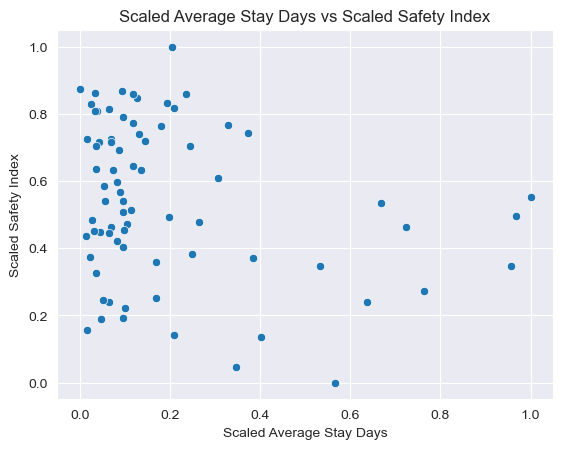

In [18]:
# %%
# Scatter plot with scaled data
sns.scatterplot(x=subset['ScaledAverageStay'], y=subset['ScaledSafetyIndex'])
plt.title('Scaled Average Stay Days vs Scaled Safety Index')
plt.xlabel('Scaled Average Stay Days')
plt.ylabel('Scaled Safety Index')
plt.show()


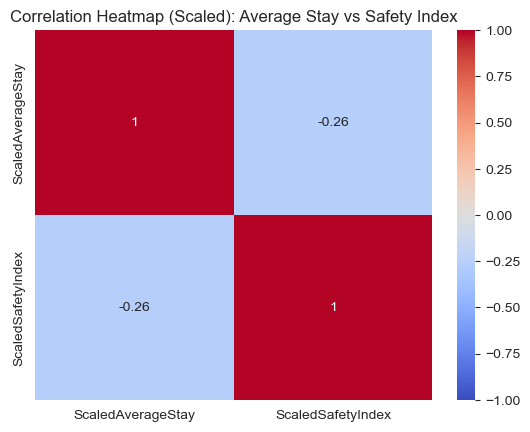

In [19]:
# %%
# Correlation heatmap (scaled)
corr = subset[['ScaledAverageStay', 'ScaledSafetyIndex']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Scaled): Average Stay vs Safety Index')
plt.show()


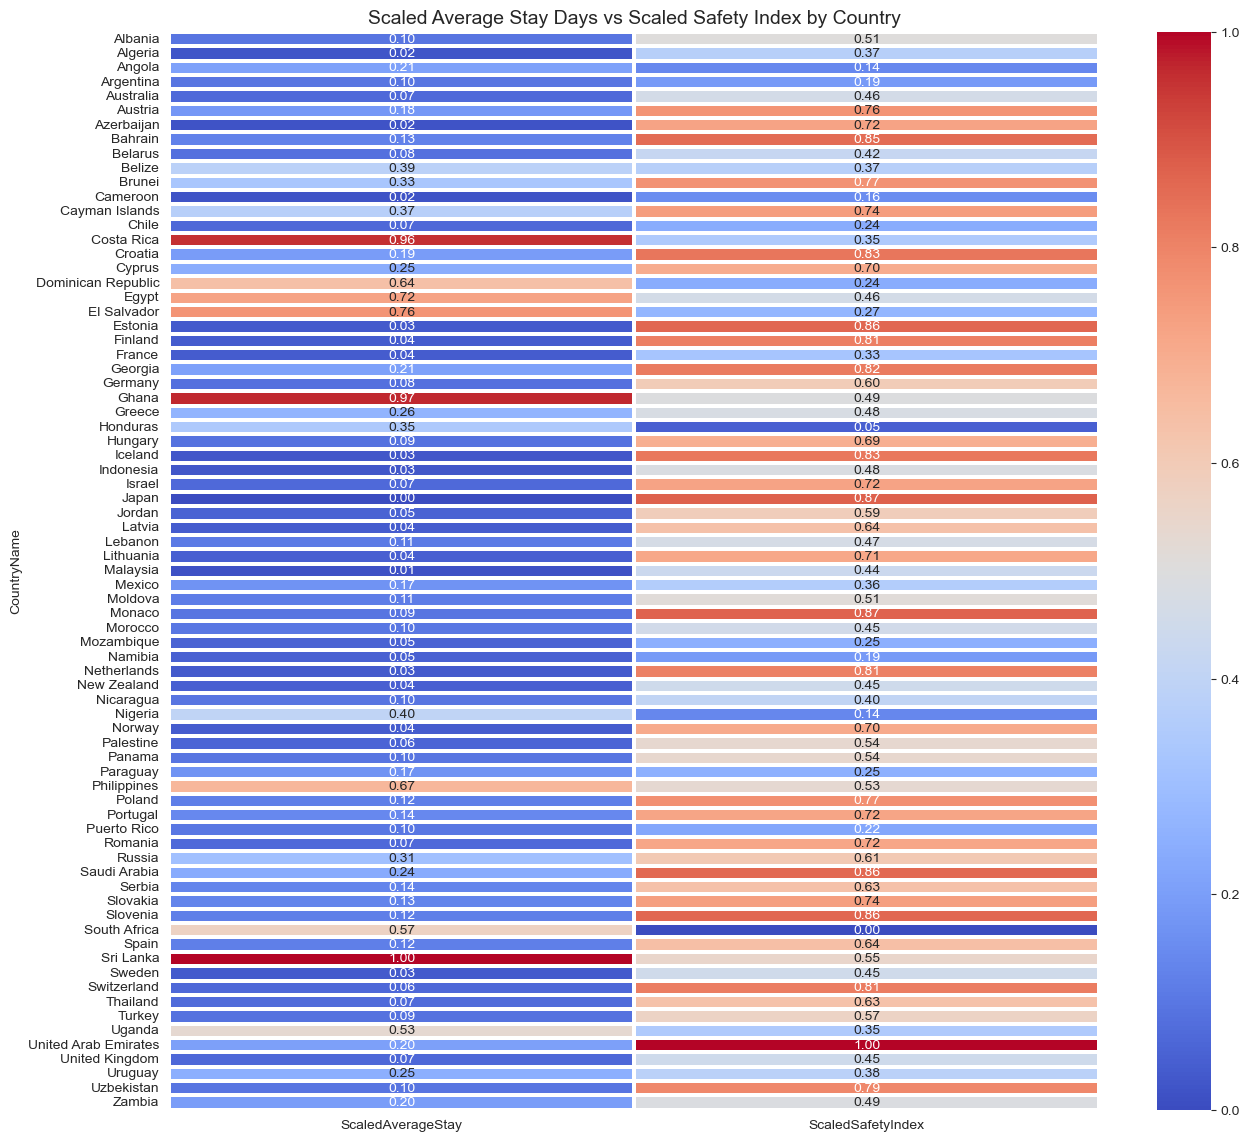

In [20]:
# %%
# Country-wise heatmap using scaled values
heatmap_data = subset[['CountryName', 'ScaledAverageStay', 'ScaledSafetyIndex']].copy()
heatmap_data.set_index('CountryName', inplace=True)

plt.figure(figsize=(15, 14))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=1.5
)
plt.title("Scaled Average Stay Days vs Scaled Safety Index by Country", fontsize=14)
plt.show()
